In [19]:
"""
conda activate contrained_k_means

"""
import numpy as np
import pickle

from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd  
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score
import os
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

%matplotlib inline


In [24]:
data_name = '3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean'
os.makedirs(f'./data/{data_name}', exist_ok = True)

with open(f'./data/{data_name}/images.pkl', 'rb') as f:
    new_projection = pickle.load( f)
          
with open(f'./data/{data_name}/angles.pkl', 'rb') as f:
    angles2 = pickle.load( f)
          
with open(f'./data/{data_name}/orientation_matrix.pkl', 'rb') as f:
    Orientation_Vectors = pickle.load(f)
          
with open(f'./data/{data_name}/indexs.pkl', 'rb') as f:
    indexs = pickle.load(f)
print('indexs',indexs[:10])     
with open(f'./data/{data_name}/mean_subtracted_strcut.pkl', 'rb') as f:
    mean_subtracted_strcut = pickle.load(f)

mus = '20220212_3DVA_data_mean_by_EM_PCA_after_subtract_senior_mean_EM_2SDR_n_20_18_is_pretrained_all_mu_40.pkl'
with open(f'./snap_shot/{mus}', 'rb') as f:
    All_mu = pickle.load(f)

indexs [3, 0, 2, 0, 2, 2, 0, 2, 4, 3]


/home/users/lewis841214/.conda/envs/contrained_k_means/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/users/lewis841214/.conda/envs/contrained_k_means/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 18.524851
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.815033
[t-SNE] KL divergence after 1000 iterations: 0.130865


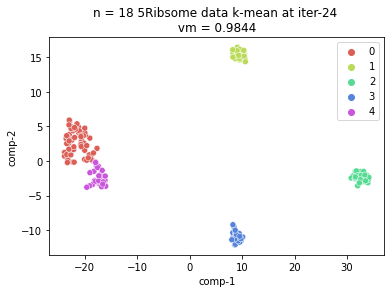

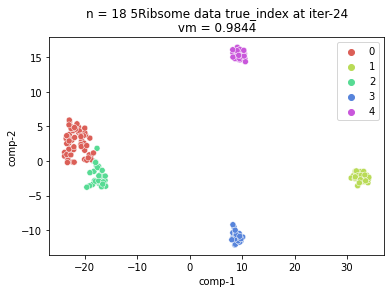

In [26]:
true_index = indexs
num_batch, batch_size = 1, 200
z_size = 18
iter_ = 24
num_batch = num_batch
indexs = true_index[:num_batch * batch_size]
np.random.seed(0)
Coef = np.array(All_mu)
tsne = TSNE(n_components=2, verbose=1, random_state=123)
Coef = Coef.reshape(Coef.shape[0], -1)
pca = PCA(n_components=5)
pca.fit(Coef)
P_Coef = pca.transform(Coef)
PCs = pca.components_
z = tsne.fit_transform(P_Coef) 

kmeans = KMeans(n_clusters=5, random_state=0).fit(P_Coef) #k-mean perform on PCA coef
kmeans.labels_
vs = v_measure_score(indexs, kmeans.labels_)
df = pd.DataFrame()
df["y"] = kmeans.labels_
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title=f"n = {z_size} 5Ribsome data k-mean at iter-{iter_} \n vm = {str(vs)[:6]} ") 
#os.makedirs(os.path.dirname(f'./TSNE_result/{self.exp_name}/n = {self.z_size} 5Ribsome data k-mean at iter-{iter_} vm = {vs} .jpg'), exist_ok = True)
#plt.savefig(f'./TSNE_result/{self.exp_name}/n = {self.z_size} 5Ribsome data k-mean at iter-{iter_} vm = {str(vs)[:6]} log_proj_var ={torch.log(self.projected_var):.2f}.jpg')
plt.show()

plt.close()
# print(indexs[:10])
df = pd.DataFrame()
df["y"] = indexs
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df).set(title=f"n = {z_size} 5Ribsome data true_index at iter-{iter_}\n vm = {str(vs)[:6]} ") 
#plt.savefig(f'./TSNE_result/{self.exp_name}/n = {self.z_size} 5Ribsome data true_index at iter-{iter_} vm = {str(vs)[:6]} log_proj_var ={torch.log(self.projected_var):.2f}.jpg')
plt.show()
plt.close()

In [28]:
from k_means_constrained import KMeansConstrained
true_index = indexs
num_batch, batch_size = 1, 200
z_size = 18
iter_ = 24
num_batch = num_batch
indexs = true_index[:num_batch * batch_size]
np.random.seed(0)
Coef = np.array(All_mu)
Coef = Coef.reshape(Coef.shape[0], -1)
pca = PCA(n_components=5)
pca.fit(Coef)
P_Coef = pca.transform(Coef)
PCs = pca.components_
top_vm = 0
for i in range(10000):
    

    #kmeans = KMeans(n_clusters=5, random_state=i).fit(P_Coef) #k-mean perform on PCA coef
    kmeans= KMeansConstrained(
        n_clusters=5, 
        random_state=i,
        size_min = batch_size / 5 -batch_size/10,
        size_max = batch_size / 5 +batch_size/10,
        
    )
    kmeans.fit(P_Coef)  
        
    
    kmeans.labels_
    vs = v_measure_score(indexs, kmeans.labels_)
    if vs > top_vm:
         
        top_vm = vs
        print(i, vs)
        """
        z = tsne.fit_transform(P_Coef)
        df = pd.DataFrame()
        df["y"] = kmeans.labels_
        df["comp-1"] = z[:,0]
        df["comp-2"] = z[:,1]

        sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                        palette=sns.color_palette("hls", 5),
                        data=df).set(title=f"n = {z_size} 5Ribsome data k-mean at iter-{iter_} \n vm = {str(vs)[:6]} ") 
        #os.makedirs(os.path.dirname(f'./TSNE_result/{self.exp_name}/n = {self.z_size} 5Ribsome data k-mean at iter-{iter_} vm = {vs} .jpg'), exist_ok = True)
        #plt.savefig(f'./TSNE_result/{self.exp_name}/n = {self.z_size} 5Ribsome data k-mean at iter-{iter_} vm = {str(vs)[:6]} log_proj_var ={torch.log(self.projected_var):.2f}.jpg')
        plt.show()

        plt.close()
        # print(indexs[:10])
        df = pd.DataFrame()
        df["y"] = indexs
        df["comp-1"] = z[:,0]
        df["comp-2"] = z[:,1]

        sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                        palette=sns.color_palette("hls", 5),
                        data=df).set(title=f"n = {z_size} 5Ribsome data true_index at iter-{iter_}\n vm = {str(vs)[:6]} ") 
        #plt.savefig(f'./TSNE_result/{self.exp_name}/n = {self.z_size} 5Ribsome data true_index at iter-{iter_} vm = {str(vs)[:6]} log_proj_var ={torch.log(self.projected_var):.2f}.jpg')
        plt.show()
        plt.close()
        """
        
        
        

0 0.9410606677168769
